##  Implement titanic survival prediction using Naive Bayes algorithm.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
df = pd.read_csv('https://github.com/codebasics/py/raw/master/ML/14_naive_bayes/titanic.csv')
df.head().T

,0,1,2,3,4
PassengerId,1,2,3,4,5
Name,"Braund, Mr. Owen Harris","Cumings, Mrs. John Bradley (Florence Briggs Th...","Heikkinen, Miss. Laina","Futrelle, Mrs. Jacques Heath (Lily May Peel)","Allen, Mr. William Henry"
Pclass,3,1,3,1,3
Sex,male,female,female,female,male
Age,22.0,38.0,26.0,35.0,35.0
SibSp,1,1,0,1,0
Parch,0,0,0,0,0
Ticket,A/5 21171,PC 17599,STON/O2. 3101282,113803,373450
Fare,7.25,71.2833,7.925,53.1,8.05
Cabin,NaN,C85,NaN,C123,NaN


In [9]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Survived
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,2.308642,29.699118,0.523008,0.381594,32.204208,0.383838
std,257.353842,0.836071,14.526497,1.102743,0.806057,49.693429,0.486592
min,1.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,223.500000,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000
50%,446.000000,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000
75%,668.500000,3.000000,38.000000,1.000000,0.000000,31.000000,1.000000
max,891.000000,3.000000,80.000000,8.000000,6.000000,512.329200,1.000000


In [10]:
df.columns

Index(['PassengerId', 'Name', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Survived'],
      dtype='object')

In [11]:
df = df.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin', 'Embarked'], axis=1)
df.head()

,Pclass,Sex,Age,Fare,Survived
0,3,male,22.0,7.2500,0
1,1,female,38.0,71.2833,1
2,3,female,26.0,7.9250,1
3,1,female,35.0,53.1000,1
4,3,male,35.0,8.0500,0


In [12]:
df['Sex'] = pd.get_dummies(df['Sex'])['female']

In [13]:
df.describe()

,Pclass,Age,Fare,Survived
count,891.000000,714.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.383838
std,0.836071,14.526497,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,20.125000,7.910400,0.000000
50%,3.000000,28.000000,14.454200,0.000000
75%,3.000000,38.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


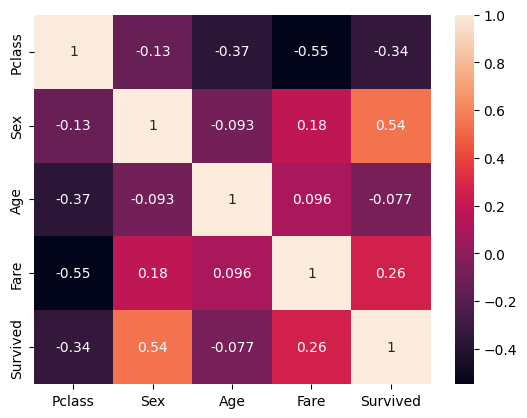

In [14]:
sns.heatmap(df.corr(), annot=True)
plt.show()

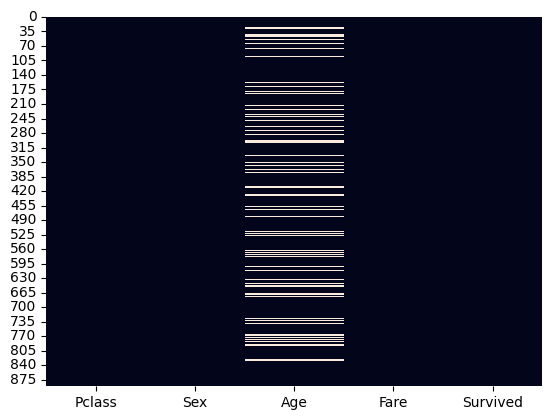

In [15]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [16]:
df.isnull().sum()

Pclass        0
Sex           0
Age         177
Fare          0
Survived      0
dtype: int64

In [17]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [18]:
df.describe()

,Pclass,Age,Fare,Survived
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.383838
std,0.836071,13.002015,49.693429,0.486592
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,22.000000,7.910400,0.000000
50%,3.000000,29.699118,14.454200,0.000000
75%,3.000000,35.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [19]:
X = df.drop('Survived', axis=1)
y = df['Survived']

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [23]:
model.fit(X_train, y_train)

GaussianNB()

### Evaluation

In [24]:
model.score(X_test, y_test)

0.753731343283582

In [25]:
import numpy as np

pd.DataFrame({
    'Predicted': model.predict(X_test[:10]),
    'Probability': [np.max(x) for x in model.predict_proba(X_test[:10])],
    'Truth': y_test[:10]
})

,Predicted,Probability,Truth
703,0,0.974697,0
860,0,0.977185,0
798,0,0.975872,0
42,0,0.975932,0
140,0,0.502060,0
888,1,0.505394,0
148,0,0.943097,0
653,1,0.504832,1
411,0,0.975745,0
210,0,0.974228,0


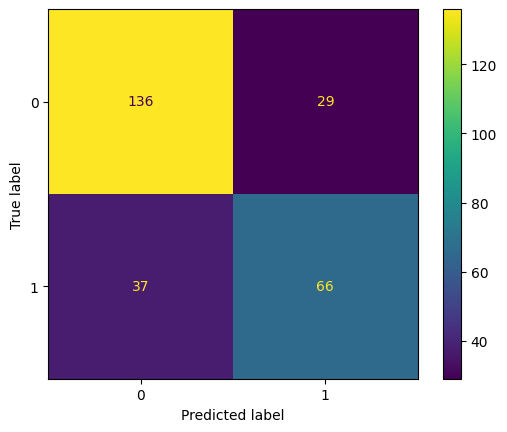

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay as CM
CM.from_predictions(y_test, model.predict(X_test))
plt.show()